Mateusz Biegański
mb385162

SAD 2020-2021

## Ex. 1

In [2]:
load("data/cancer.RData")

In [278]:
source("~/dotfiles/basic.R")

[1] "==== include successfull!"


In [24]:
dim(data.test)
dim(data.train)

[1]   270 17737

[1]   629 17738

In [4]:
data.train %>% dplyr::select(where(is.numeric)) %>% dim

[1]   629 17738

As we see, all of 17 737 predictors are **quantitive** variables.

In [229]:
dim(data.train)
predictors = data.train[,!(names(data.train) == "Y")]
Y = data.train[,(names(data.train) == "Y")]

[1]   629 17738

In [242]:
library("Rfast")
variances <- colVars(as.matrix(predictors))
variances <- cbind(colnames(predictors) %>% data.frame, as.numeric(variances))

variances.top <- variances[order(variances[,2], decreasing=TRUE) ,] %>% head(n=500)
head(variances.top)

,.,as.numeric(variances)
,<chr>,<dbl>
5897,ENSG00000129824,15.42931
12326,ENSG00000171345,15.41742
446,ENSG00000026025,13.29809
14471,ENSG00000184292,13.18422
10625,ENSG00000163993,12.95223
4881,ENSG00000120708,12.46681


In [219]:
predictors.top <- predictors[,(colnames(predictors) %in% variances.top[,1])]
predictors.top %>% head
predictors.top.cor <- predictors.top %>% cor
predictors.top.cor %>% head

,ENSG00000003436,ENSG00000006042,ENSG00000006327,ENSG00000008394,ENSG00000010278,ENSG00000011422,ENSG00000013588,ENSG00000019549,ENSG00000019582,ENSG00000021355,⋯,ENSG00000225356,ENSG00000226742,ENSG00000229645,ENSG00000229807,ENSG00000230937,ENSG00000231389,ENSG00000234745,ENSG00000240065,ENSG00000249992,ENSG00000250722
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.738679,7.292036,10.053723,12.068000,11.534013,6.432136,8.947814,4.439054,4.867821,11.417747,⋯,11.891960,8.068028,3.376597,7.870367,8.841993,6.381351,11.408045,8.210151,4.161056,8.277881
2,9.154442,7.073319,10.219469,7.206836,8.611767,6.615284,5.850255,7.536808,4.081246,5.986999,⋯,5.446633,6.401993,4.730853,2.813307,4.414529,4.397807,12.275470,9.903622,6.888816,3.979477
3,3.661229,3.375650,5.095637,10.027549,3.423976,3.448048,3.225091,3.547359,9.930930,5.105649,⋯,3.521633,3.002025,6.840491,7.923151,3.102609,12.248971,12.809778,9.748867,4.176651,3.241387
4,10.931389,6.908048,10.090588,11.218421,9.305592,7.962113,6.308959,10.636092,3.074641,8.493676,⋯,4.061878,6.690408,3.871822,2.877862,2.969621,3.437129,7.531811,6.513895,9.340064,8.874202
5,5.737307,3.806449,10.701294,10.392985,11.142862,9.023755,7.092871,6.161033,5.937077,11.471053,⋯,11.218167,9.572179,8.766891,2.817808,11.042007,8.239928,11.986676,8.627590,9.196053,3.195274
6,6.543456,3.185560,9.768617,8.567256,9.402522,10.024477,4.909429,3.291315,2.957709,6.776894,⋯,3.451492,7.451351,5.324840,2.861722,3.080982,3.301306,9.336713,6.487561,10.402078,3.114112


,ENSG00000003436,ENSG00000006042,ENSG00000006327,ENSG00000008394,ENSG00000010278,ENSG00000011422,ENSG00000013588,ENSG00000019549,ENSG00000019582,ENSG00000021355,⋯,ENSG00000225356,ENSG00000226742,ENSG00000229645,ENSG00000229807,ENSG00000230937,ENSG00000231389,ENSG00000234745,ENSG00000240065,ENSG00000249992,ENSG00000250722
ENSG00000003436,1.000000000,0.001944795,0.46214383,0.33428854,0.11059517,0.45033246,0.28553356,0.16048749,-0.2240648,0.2239910,⋯,-0.01339855,0.1233811,-0.23587563,0.0003260066,-0.056169980,-0.1738195,0.12100490,0.10256356,0.31312288,0.111480954
ENSG00000006042,0.001944795,1.000000000,0.01685548,-0.02897825,0.04982151,-0.04450551,-0.02149385,0.13181625,-0.2721343,-0.1411490,⋯,0.02992628,0.1246075,-0.09008806,0.0086184248,-0.178795789,-0.1782820,-0.29781849,-0.36611551,0.02659412,0.214294169
ENSG00000006327,0.462143825,0.016855475,1.00000000,0.37617123,0.54334606,0.64550388,0.60965202,0.42715255,-0.3899309,0.3454371,⋯,0.26617180,0.4241373,-0.48709081,-0.0458984540,0.252731162,-0.3666960,0.12801247,0.04235114,0.43740581,-0.007493103
ENSG00000008394,0.334288537,-0.028978252,0.37617123,1.00000000,0.24034522,0.33416075,0.31030416,0.05566475,-0.2145513,0.2866749,⋯,0.32063730,0.2353013,-0.25307105,-0.0499065718,0.096892608,-0.2349765,0.02813955,-0.07133926,0.15282362,0.249254255
ENSG00000010278,0.110595175,0.049821511,0.54334606,0.24034522,1.00000000,0.33710120,0.54278524,0.20296464,-0.2333856,0.2525530,⋯,0.45422669,0.4056652,-0.24097043,0.0143440810,0.366078870,-0.2398330,0.02732095,-0.01428085,0.10882034,0.104891858
ENSG00000011422,0.450332460,-0.044505510,0.64550388,0.33416075,0.33710120,1.00000000,0.47224437,0.33270242,-0.2533967,0.3560032,⋯,0.04256098,0.1671709,-0.23067050,-0.0456453213,0.003327218,-0.2281409,0.24735959,0.17288210,0.54105011,-0.133323707


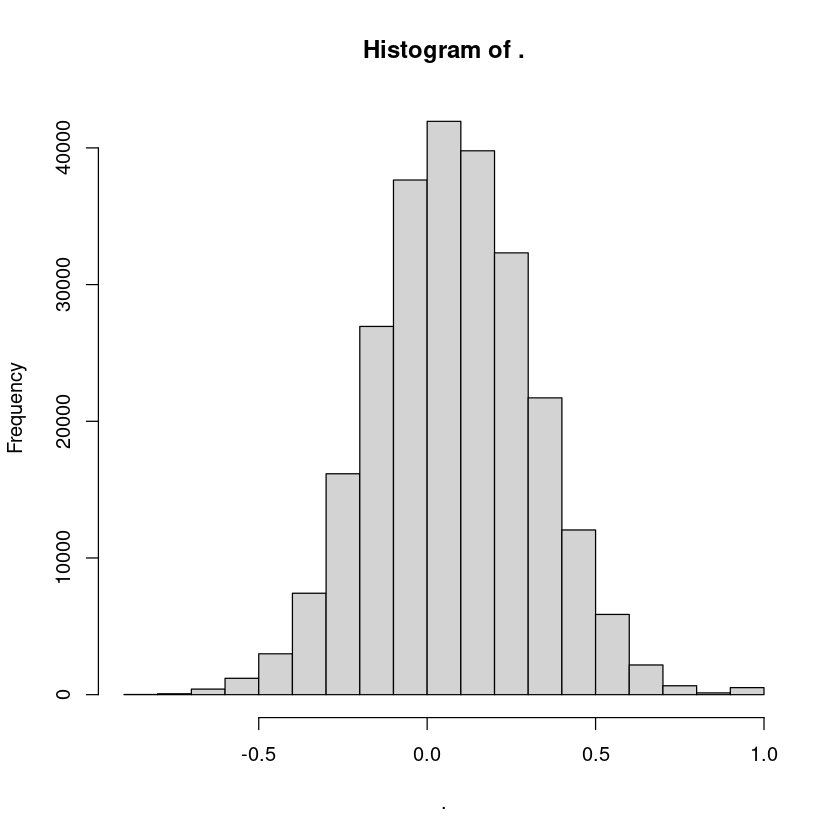

In [243]:
sapply(predictors.top.cor, mean) %>% hist

Let's look at the correlation plot of 10 (not 500 for visibility purposes) arbitrary-selected variables.

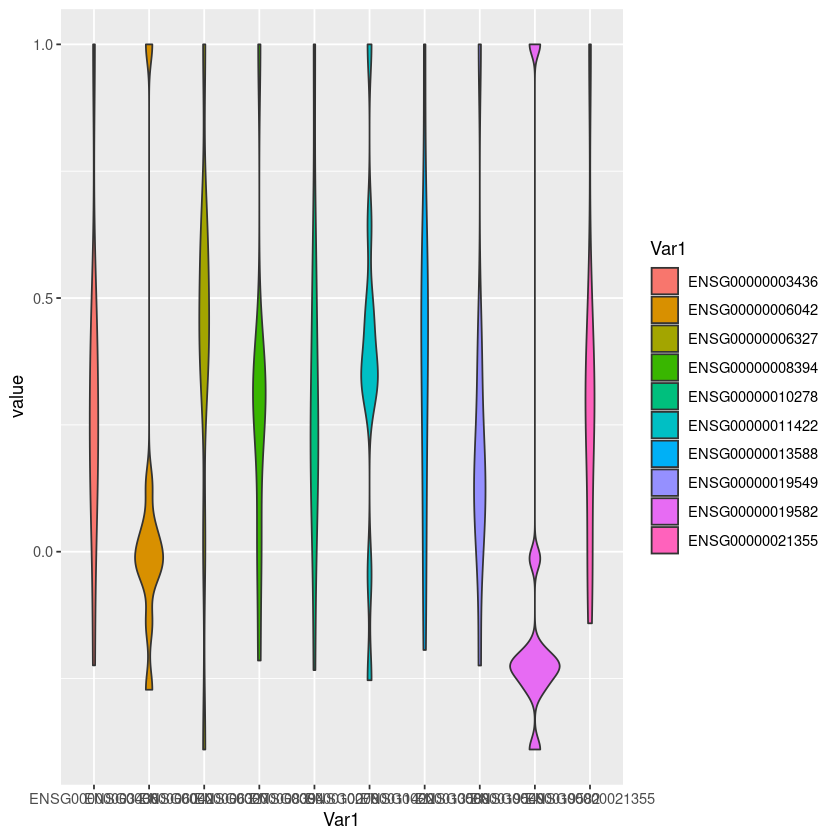

In [221]:
library(ggplot2)

num=10
plot_df <- reshape2::melt(predictors.top.cor[1:num, 1:num])
ggplot(data = plot_df) + geom_violin(aes(Var1, value, fill = Var1))

## Ex. 2

### Elastic net

to standard linear regression model penalty there is an additional factor added:

$\lambda$*($\alpha$* $\lVert\beta\rVert _1$ + (1-$\alpha$)*$\lVert\beta\rVert _2 ^2$ )

It is sort of mix of Lasso and Ridge regression model - it can easily fix highly correlated variables issue, by clustering and either emphasizing or suppressing whole groups.

* Estimated parameters:
    * $\lambda$
* Tuning parameters:
    * $\alpha$

## Ex. 3

Let's observe, that variables with zero or near-zero variance aren't very meaningful for us - it's hard to explain response variable in terms of linear combination of near-constant variables. Instead let's focus on topN (N=500) variables, in terms of variance.

## Ex. 4

In [306]:
elastic_fn = function(alpha) {
    cvfit <- cv.glmnet(predictors.top %>% as.matrix, Y %>% as.matrix, alpha=alpha, type.measure="mse")
    plot(cvfit)
    print(cvfit)
    cvfit
}


Call:  cv.glmnet(x = predictors.top %>% as.matrix, y = Y %>% as.matrix,      type.measure = "mse", alpha = alpha) 

Measure: Mean-Squared Error 

    Lambda Index Measure       SE Nonzero
min 0.4248    64 0.04634 0.003342     500
1se 1.7150    49 0.04929 0.003036     500

Call:  cv.glmnet(x = predictors.top %>% as.matrix, y = Y %>% as.matrix,      type.measure = "mse", alpha = alpha) 

Measure: Mean-Squared Error 

     Lambda Index Measure       SE Nonzero
min 0.02420    28 0.04790 0.003099      60
1se 0.04641    21 0.05058 0.003214      32

Call:  cv.glmnet(x = predictors.top %>% as.matrix, y = Y %>% as.matrix,      type.measure = "mse", alpha = alpha) 

Measure: Mean-Squared Error 

     Lambda Index Measure       SE Nonzero
min 0.01674    30 0.04766 0.002213      78
1se 0.03524    22 0.04980 0.001956      34

Call:  cv.glmnet(x = predictors.top %>% as.matrix, y = Y %>% as.matrix,      type.measure = "mse", alpha = alpha) 

Measure: Mean-Squared Error 

     Lambda Index Measure   

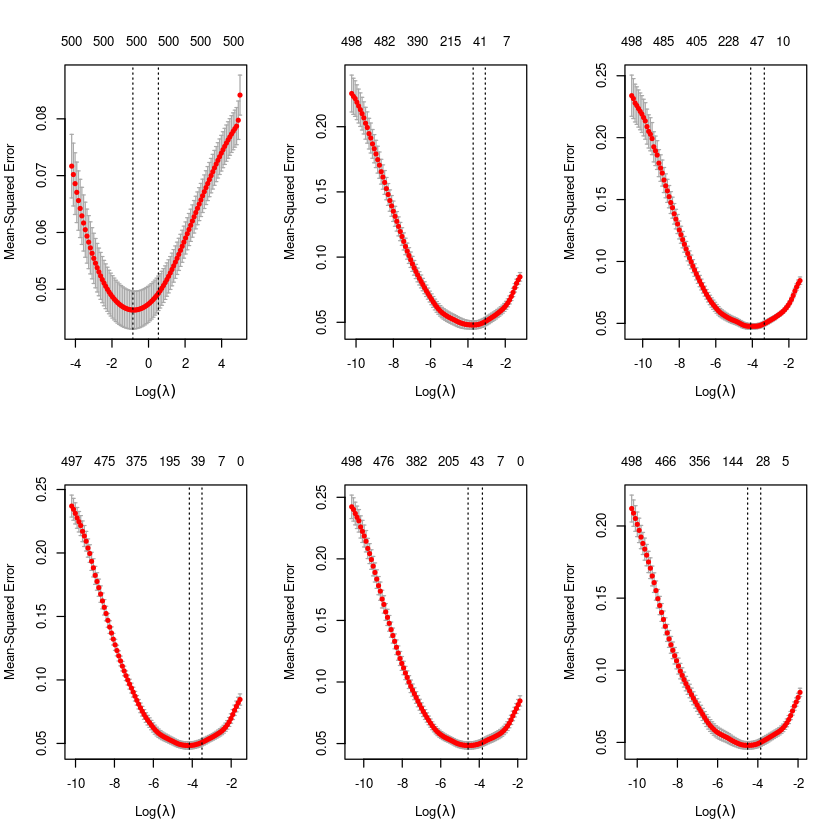

In [375]:
library("purrr")
tuning_alpha = c(0.0, .5, .6, .7, .98, 1.0)

par(mfrow=c(2,3))
cvfits <- map(tuning_alpha, elastic_fn)

[[1]]
[1] 0.003036218

[[2]]
[1] 0.003214266

[[3]]
[1] 0.001955679

[[4]]
[1] 0.002702971

[[5]]
[1] 0.003019173

[[6]]
[1] 0.002660725

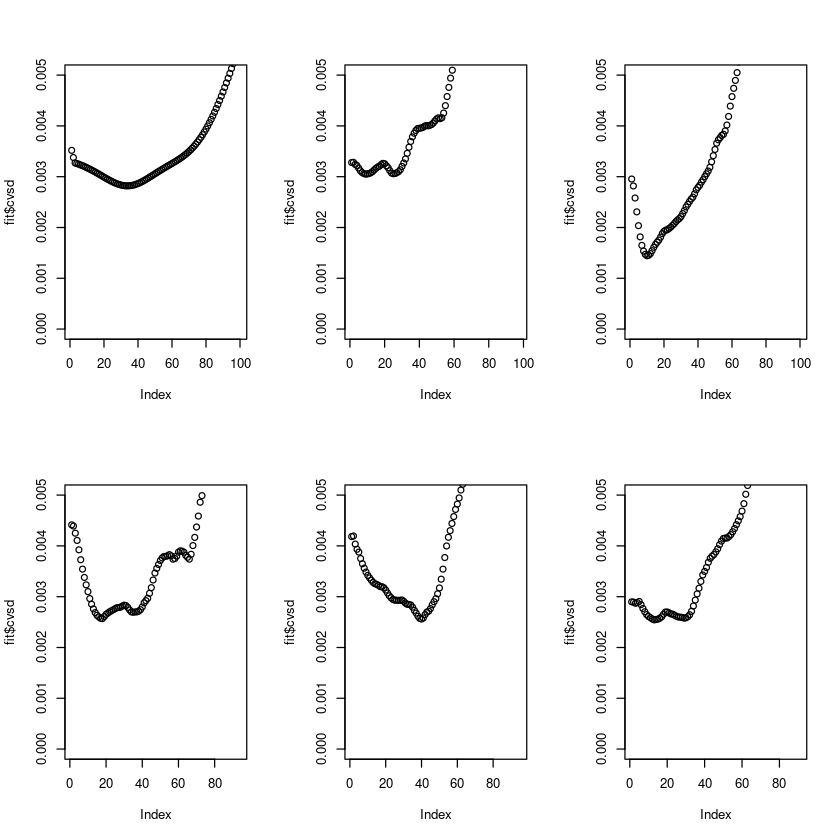

In [436]:
par(mfrow=c(2,3))
map2(cvfits, indices_1se, function(fit, idx) {plot(fit$cvsd, ylim=c(0, 0.005)) }) %>% invisible
cvms <- map2(cvfits, indices_1se, function(fit, idx) { fit$cvsd[[idx]] })
cvms



| $\alpha$ | 1se $\lambda$ | 1se MSE   |  st. err  | non-zero |
|----------|---------------|-----------|-----------|----------|
|    0.0   |      1.715    |   0.049   |    0.0030 |   500    |
|    0.5   |      0.046    |   0.051   |    0.0030 |    32    |
|    0.6   |      0.035    |   0.050   |    0.0020 |    34    |
|    0.7   |      0.030    |   0.050   |    0.0027 |    33    |
|   0.98   |      0.022    |   0.051   |    0.0030 |    33    |
|   1.00   |      0.021    |   0.050   |    0.0027 |    33    |
    

 The results may be a bit different from run to run, as cv.glmnet introduces some randomness.

As we see resuts for $\alpha \ge 0.5$ are quite similar, however standard error estimate for  $\alpha = 0.6$ is outstandingly low (as you can see in plot above). For that reason I decided to pick that model and train it on whole data, as specified in `Build final model` section.

Elastic net on our data yields predictions with quality ~95% (using only $\leq$ 35 parameters). 

### Random forest

In [265]:
library("randomForest")
rv.fit <- rfcv(predictors.top, Y, cv.fold=10)

In [287]:
with(rv.fit, print(error.cv))

       500        250        125         62         31         16          8 
0.05033512 0.04990113 0.04941536 0.04929882 0.04962016 0.05005054 0.05081960 
         4          1 
0.05846279 0.09243367 


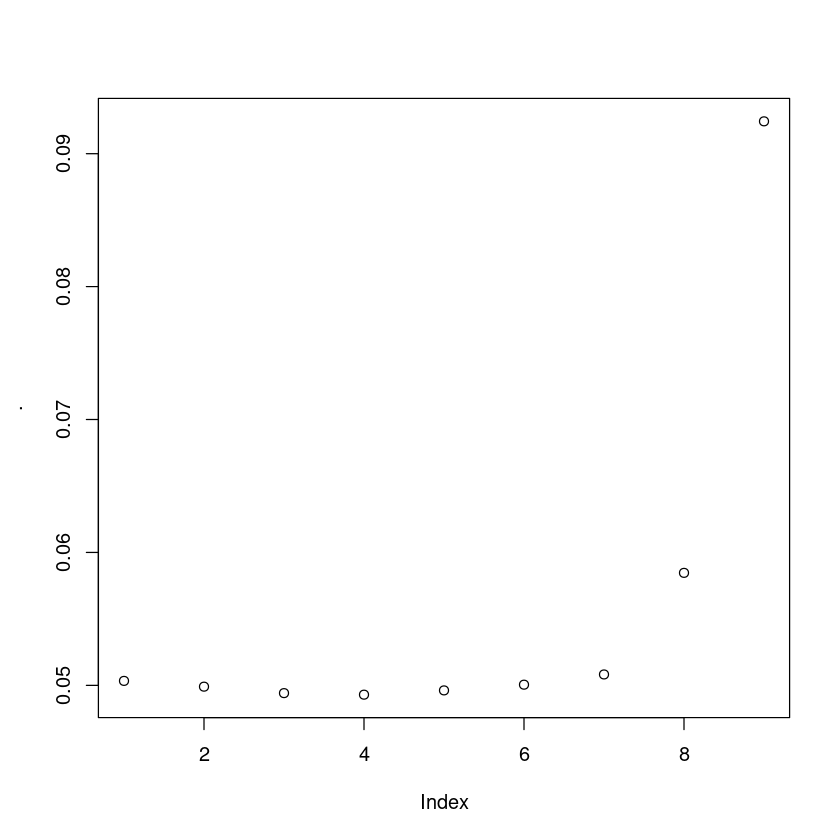

In [285]:
with(rv.fit, error.cv %>% plot)

As we see, random forest cross validation yields very similar results to Elastic net.

## Building final model

To avoid overfitting, I pick 1se error instead of lambda.min.

In [290]:
data.test.top <- data.test[, (names(data.test) %in% colnames(predictors.top))]
dim(data.test.top)
head(data.test.top, n=3)

[1] 270 500

,ENSG00000003436,ENSG00000006042,ENSG00000006327,ENSG00000008394,ENSG00000010278,ENSG00000011422,ENSG00000013588,ENSG00000019549,ENSG00000019582,ENSG00000021355,⋯,ENSG00000225356,ENSG00000226742,ENSG00000229645,ENSG00000229807,ENSG00000230937,ENSG00000231389,ENSG00000234745,ENSG00000240065,ENSG00000249992,ENSG00000250722
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.703297,3.121139,4.722746,8.795903,9.829350,3.075021,3.158506,3.496366,3.087044,4.211647,⋯,3.424966,2.987321,9.376931,2.770945,3.069239,3.859017,10.92986,9.235794,4.414093,5.541893
2,3.193795,5.573175,4.085185,10.966158,3.118725,3.989998,3.356443,3.114776,9.944087,4.003625,⋯,4.640668,3.182163,7.411475,2.924527,3.084634,11.241403,11.09146,7.415694,4.857924,2.674016
3,8.416925,4.784578,6.531656,9.468683,10.519940,4.245409,4.035629,3.557882,3.496759,8.999140,⋯,11.771042,9.258052,5.700395,2.968263,3.160607,3.503682,11.98222,7.968637,3.855812,8.617347


In [ ]:
glmnet(data.test.top,)


coef_cv=coef(cvfit, s = "lambda.min")
# prediction of the final model
predict(cvfit, newx = x[1:5,], s = "lambda.min")

In [347]:
# make sure that order of test columns corresponds to train columns
all(predictors.top %>% names == data.test.top %>% names)

[1] TRUE

In [474]:
model = cvfits[[which(tuning_alpha == .6)]]

pred <- predict(model, data.test.top %>% as.matrix) 
dim(pred)
head(pred)


[1] 270   1

1
0.9778030
0.8256894
0.6693154
0.5748931
0.5928852
0.7649255


In [475]:
fname = "bieganski.RData"
save(pred, file = fname)
pred = "DUMMY" # to check whether it loads properly
load(fname)
pred %>% head

1
0.9778030
0.8256894
0.6693154
0.5748931
0.5928852
0.7649255
